<a href="https://colab.research.google.com/github/i-ninte/machine_learning/blob/main/LOAN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

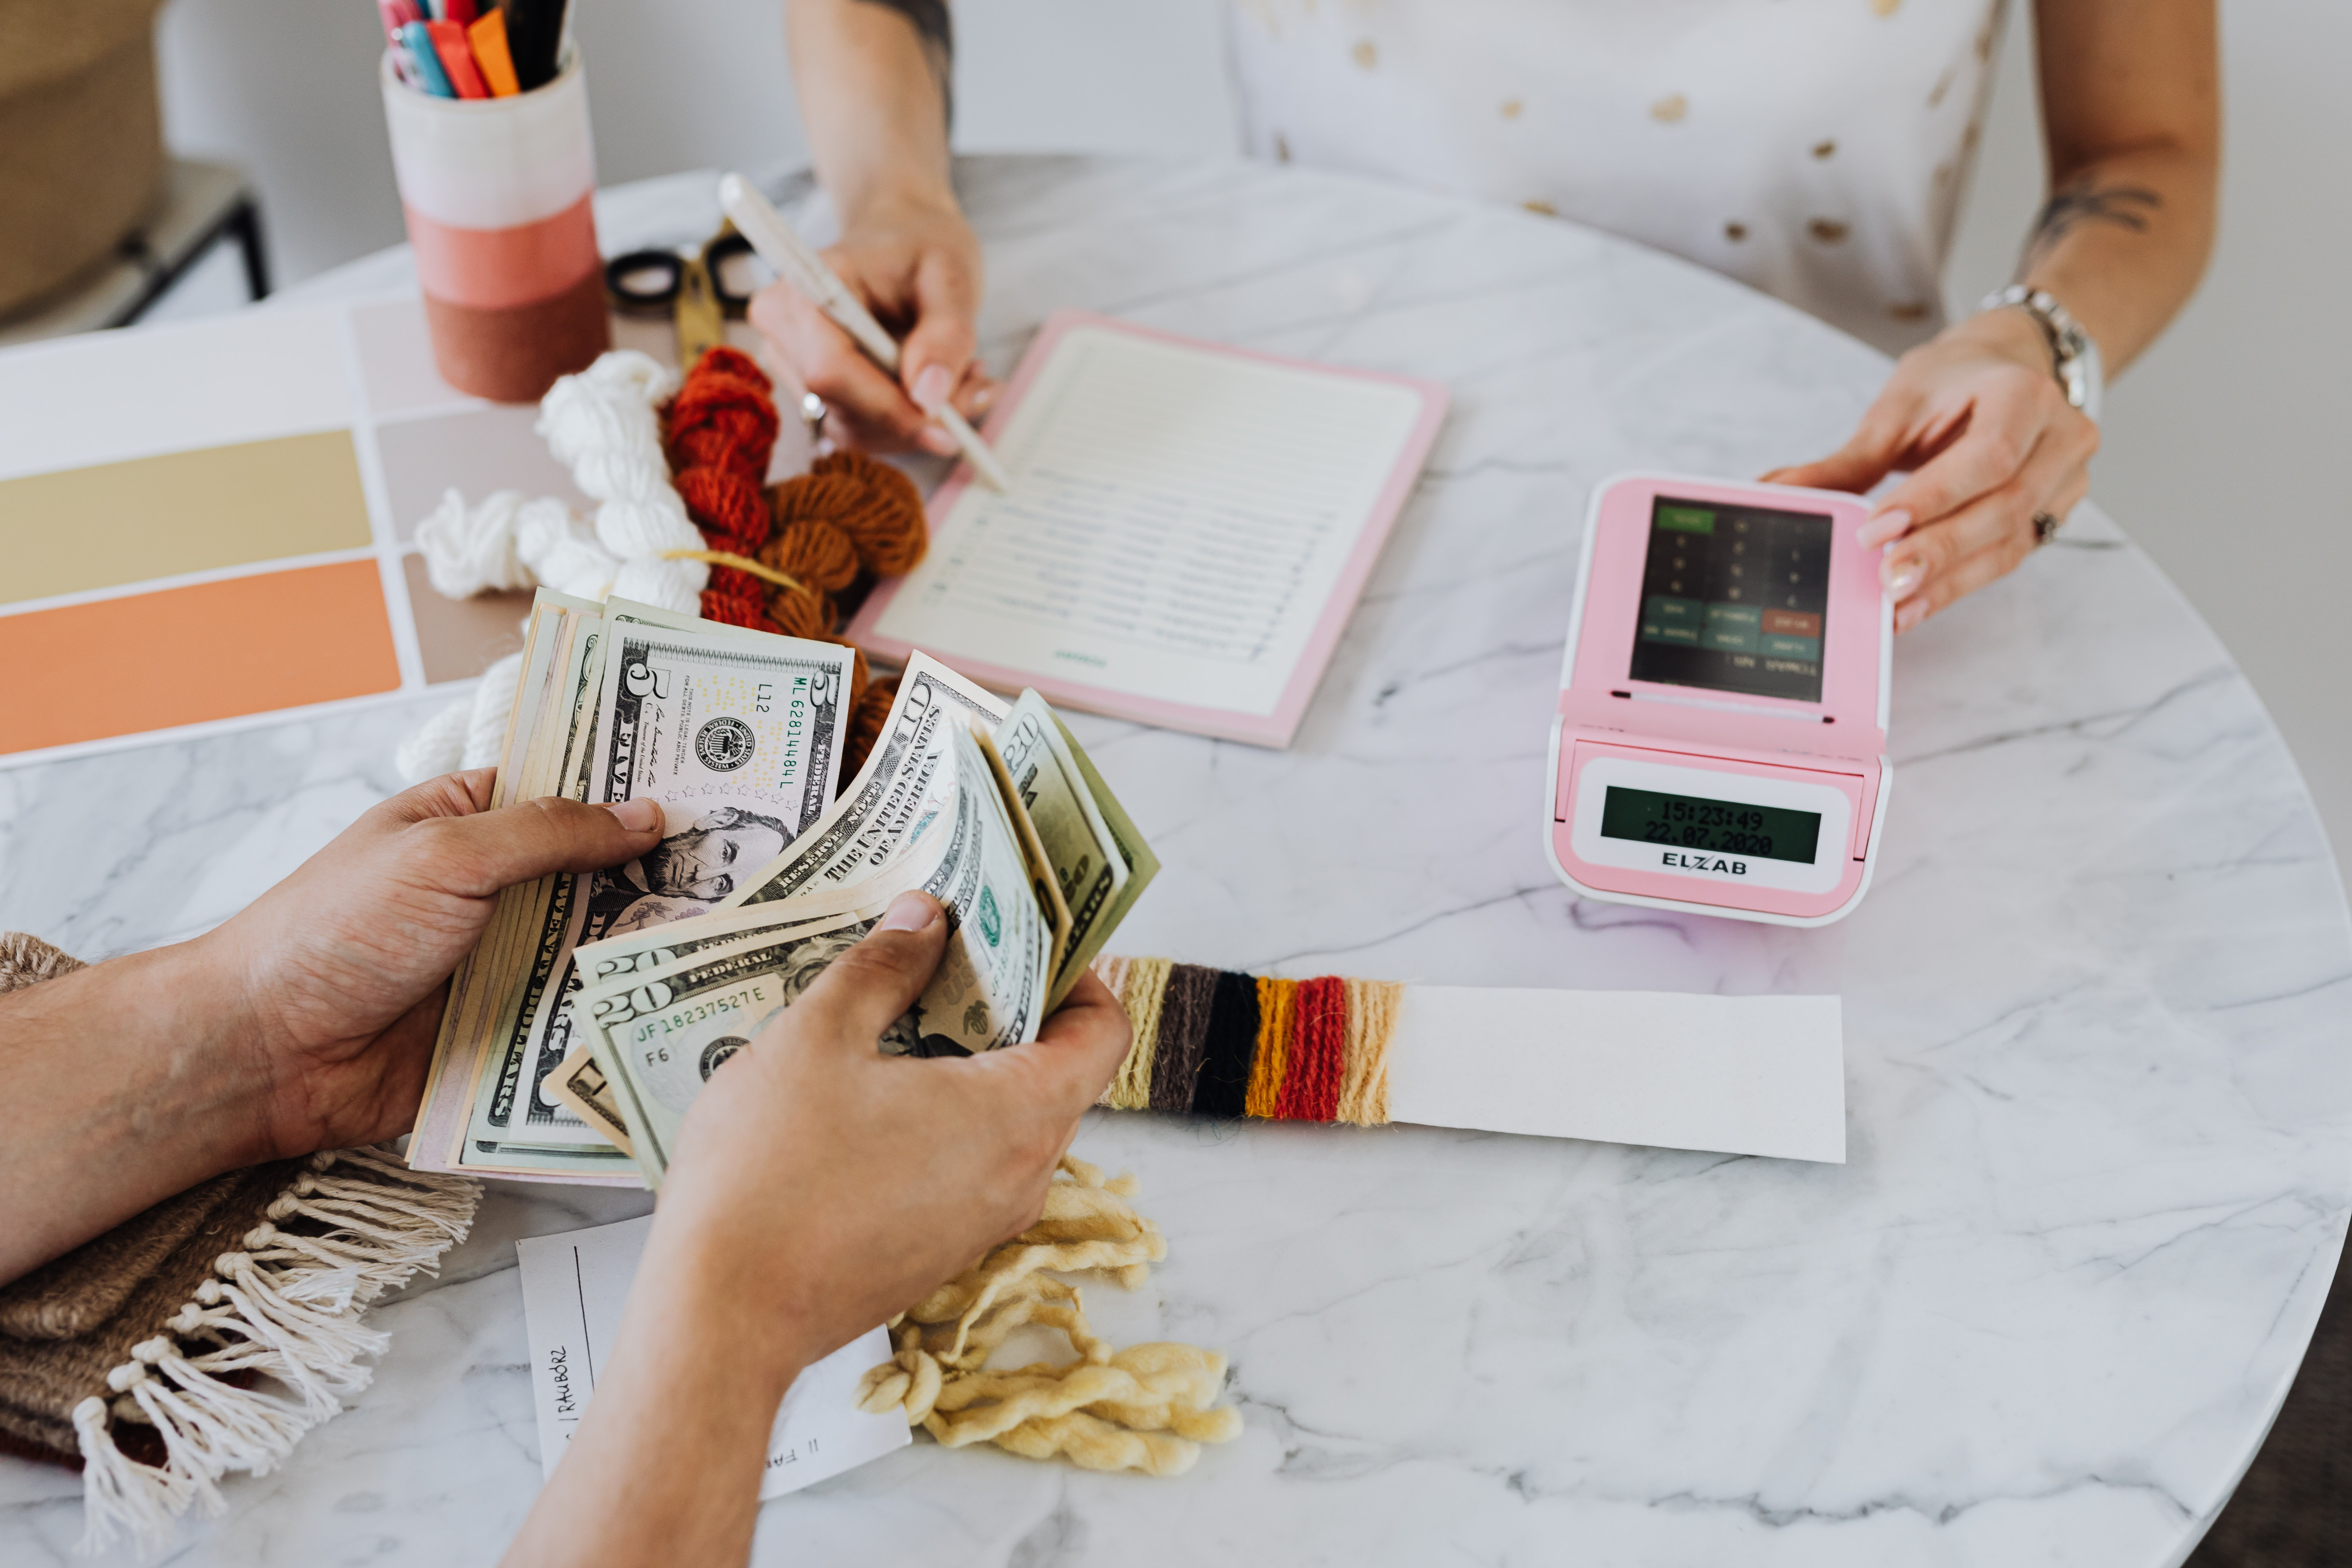



---

# Predictive Loan Approval System

#Introduction:

In today's fast-paced world, access to financial assistance is a crucial aspect of realizing one's dreams and achieving financial goals. Whether it's for buying a home, starting a business, or pursuing higher education, loans have become an indispensable part of our lives. However, the loan application process can often be time-consuming, cumbersome, and uncertain. Applicants are left wondering, "Will I be approved for the loan I need?" This is where our innovative project, the Predictive Loan Approval System, steps in.

Our Predictive Loan Approval System is designed to streamline and simplify the loan application process, making it more efficient, transparent, and applicant-friendly. By harnessing the power of data science and machine learning, we empower individuals to take control of their financial future. Whether you are a first-time homebuyer, an entrepreneur seeking capital, or a student aspiring for higher education, our system provides clarity and confidence in your loan application journey.

Key Features:

1. **Quick and Precise Loan Decisions:** With the Predictive Loan Approval System, you will receive a quick and precise decision on your loan application. Say goodbye to the uncertainty of waiting for days or even weeks for loan approval.


2. **Data-Driven Predictions:** Leveraging the power of machine learning and advanced algorithms, our system analyzes your application data and assesses your creditworthiness. It considers various factors, including credit history, income, and other relevant information, to make accurate loan predictions.



3. **Instant Notifications:** As soon as a decision is made, you'll receive an instant notification, ensuring you are kept in the loop every step of the way.

**Why Choose the Predictive Loan Approval System:**

Our system isn't just about securing loans; it's about empowering you to achieve your financial goals. Whether it's a home loan, business loan, or personal loan, we understand the importance of timely financial support.

With our Predictive Loan Approval System, you can expect:

- Faster access to financial assistance
- Improved loan approval rates
- Valuable insights to enhance your creditworthiness
- An applicant-centric approach to the loan application process

I believe that financial decisions should be accessible, fair, and transparent. Join us on this journey to simplify the loan application process and receive timely notifications upon approval. Let the Predictive Loan Approval System be your financial partner, helping you realize your dreams and aspirations.

It's time to make informed financial decisions and embrace a brighter, more secure financial future with our Predictive Loan Approval System.

---



In [ ]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [ ]:
df= pd.read_csv("LOAN.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History Property_Area Loan_Status  LoanAmount_log  
0             1.0         Urban           Y        4.857444  
1             1.0         Rural   

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

<Axes: >

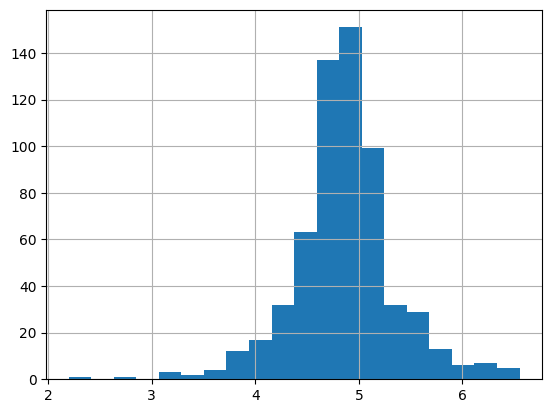

In [ ]:
df['LoanAmount_log']= np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

<Axes: >

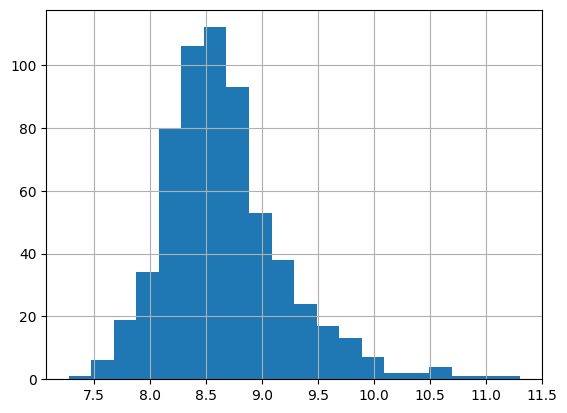

In [ ]:
df['TotalIncome']= df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log']= np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [ ]:
df['LoanAmount_log']= np.log(df['LoanAmount'])

In [ ]:
#filling null values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
#filling loan amount with the mean
df.LoanAmount= df.LoanAmount.fillna(df.LoanAmount.mean())
df.LoanAmount_log= df.LoanAmount_log.fillna(df.LoanAmount_log.mean())

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)



In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [16]:
#selecting some columns for training
x=df.iloc[:,np.r_[1:5,9:11,13:15]].values
y=df.iloc[:,12].values
x

array([['Male', 'No', '0', ..., 1.0, 4.986425672954842, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [ ]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [ ]:
print("percentage of missing gender is %2f%%" %((df['Gender'].isnull().sum()/df.shape[0] * 100)))

percentage of missing gender is 0.000000%


In [ ]:
df.shape[0]

614

number of people who take loan as group by gender: 
Male      502
Female    112
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

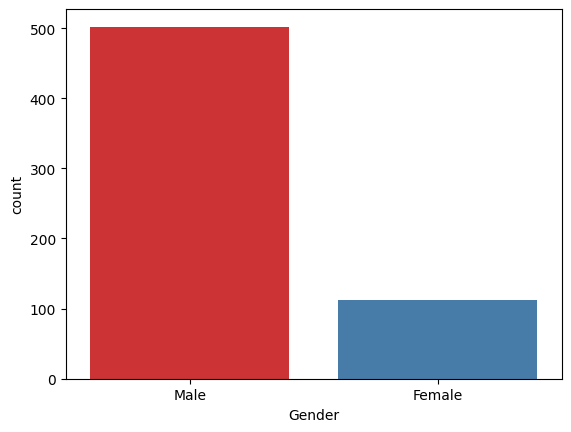

In [ ]:
print("number of people who take loan as group by gender: ")
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data=df, palette='Set1')

number of people who take loan as group by marital status: 
Yes    401
No     213
Name: Married, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

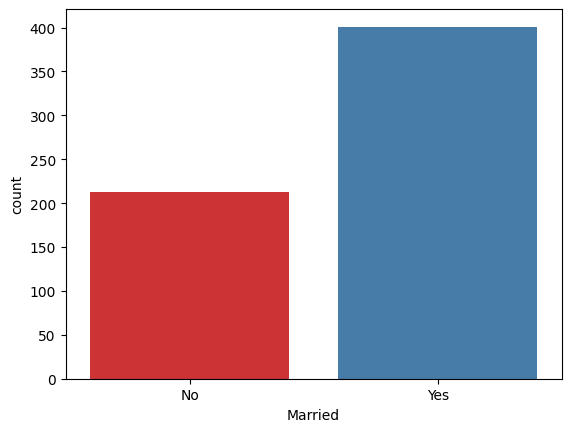

In [ ]:
print("number of people who take loan as group by marital status: ")
print(df['Married'].value_counts())
sns.countplot(x='Married', data=df, palette='Set1')

number of people who take loan as group by self employed: 
No     532
Yes     82
Name: Self_Employed, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

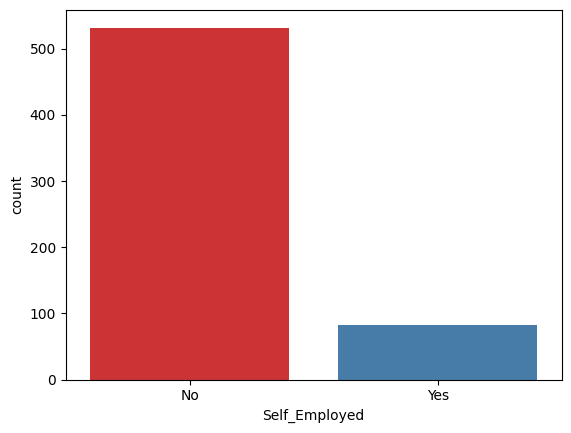

In [ ]:
print("number of people who take loan as group by self employed: ")
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed', data=df, palette='Set1')

number of people who take loan as group by dependents: 
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

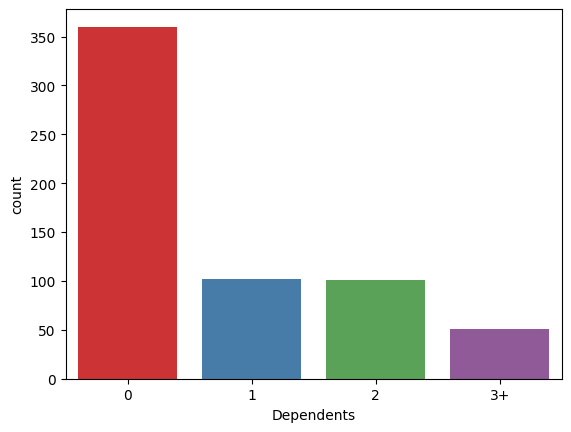

In [ ]:
print("number of people who take loan as group by dependents: ")
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents', data=df, palette='Set1')

number of people who take loan as group by loan amount: 
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='count'>

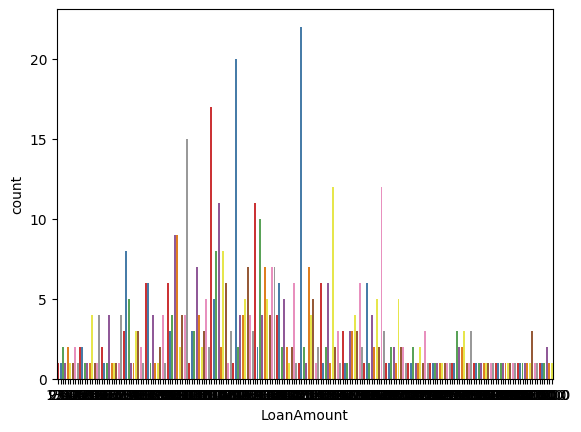

In [ ]:
print("number of people who take loan as group by loan amount: ")
print(df['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount', data=df, palette='Set1')

In [ ]:


# Define loan amount ranges
bins = [0, 100, 200, 300, 400, 500, 600, 700, float("inf")]
labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700', '700+']

# Create a new column in your DataFrame to represent the loan amount ranges
df['LoanAmountRange'] = pd.cut(df['LoanAmount'], bins=bins, labels=labels, include_lowest=True)

# Group the data by 'LoanAmountRange' and calculate the mean loan amount in each range
loan_amount_summary = df.groupby('LoanAmountRange')['LoanAmount'].mean().reset_index()

# Rename columns for clarity
loan_amount_summary.columns = ['Loan Amount Range', 'Average Loan Amount']

# Display the table
print(loan_amount_summary)


  Loan Amount Range  Average Loan Amount
0             0-100            75.909091
1           101-200           140.173862
2           201-300           244.117647
3           301-400           340.600000
4           401-500           473.555556
5           501-600           590.000000
6           601-700           675.000000
7              700+                  NaN


number of people who take loan as group by loan amount: 
1.0    525
0.0     89
Name: Credit_History, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

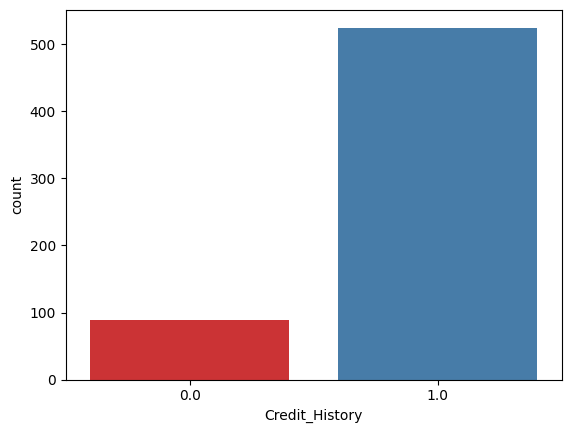

In [ ]:
print("number of people who take loan as group by loan amount: ")
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History', data=df, palette='Set1')

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=0)

from sklearn.preprocessing import LabelEncoder
LabelEncoder_x= LabelEncoder()

In [18]:
for i in range(0,5):
    X_train[:, i]= LabelEncoder_x.fit_transform(X_train[:,i])
    X_train[:,7]=LabelEncoder_x.fit_transform(X_train[:,7])
X_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [19]:
LabelEncoder_y= LabelEncoder()
y_train= LabelEncoder_y.fit_transform(y_train)


y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [20]:
for i in range(0,5):
    X_test[:,i]= LabelEncoder_x.fit_transform(X_test[:,i])
    X_test[:,7]= LabelEncoder_x.fit_transform(X_test[:,7])

X_test

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 85],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 28],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 104],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 80],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 22],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 70],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 77],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 114],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 53],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 55],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 4],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 96],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 97],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 117],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 22],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 32],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371, 25],
       [0, 0, 0, 0, 5, 1.0, 4.532599493153256, 1],
       [1, 1

##ENCODING

In [21]:
LabelEncoder_y= LabelEncoder()
y_test= LabelEncoder_y.fit_transform(y_test)


y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

##SCALING

In [22]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

##TRAINING AND MODEL SELECTION

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_clf= RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
#checking which columns are best fit for prediction
from sklearn import metrics
y_pred= rf_clf.predict(X_test)
print("accuracy of random forest classifier is: ", metrics.accuracy_score(y_pred, y_test))

y_pred

accuracy of random forest classifier is:  0.7560975609756098


array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [25]:
from sklearn.naive_bayes import GaussianNB
nb_clf= GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

##CHECKING MODEL ACCURACY

In [26]:
y_pred= nb_clf.predict(X_test)
print("accuracy of gaussianNB is: ", metrics.accuracy_score(y_pred, y_test))

accuracy of gaussianNB is:  0.8292682926829268


In [ ]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
df['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf= DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred= dt_clf.predict(X_test)
print("accuracy of decision tree classifier is: ", metrics.accuracy_score(y_pred, y_test))

accuracy of decision tree classifier is:  0.7317073170731707


In [ ]:
y_pred

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf= KNeighborsClassifier()
kn_clf.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
y_pred= kn_clf.predict(X_test)
print("accuracy is: ", metrics.accuracy_score(y_pred, y_test))

accuracy is:  0.7967479674796748


BEST MODEL IS GaussianNB

Hence we create the machine learning model with it.

##DATA CONVERSION

In [29]:
#0 for male, 1 for female
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})


In [30]:
df['Education'] = df['Education'].replace({'Not Graduate': 0, 'Graduate': 1})

In [31]:
df['Married'] = df['Married'].replace({'No': 0, 'Yes': 1})

In [32]:
df['Property_Area'] = df['Property_Area'].replace({'Rural': 0, 'Semiurban':1, 'Urban': 2})

In [33]:
df['Loan_Status'] = df['Loan_Status'].replace({'N': 0, 'Y': 1})

In [34]:
df['Self_Employed'] = df['Self_Employed'].replace({'No': 0, 'Yes': 1})

In [35]:
# Replace "3+" with 3
df['Dependents'] = df['Dependents'].replace('3+', 3)


df['Dependents'] = pd.to_numeric(df['Dependents'])


In [36]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515


In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'TotalIncome', 'TotalIncome_log'],
      dtype='object')

In [37]:
from sklearn.naive_bayes import GaussianNB

def predict_loan_approval(df, feature_cols, outcome_col):
    # Separate the features and the outcome
    x = df[feature_cols].values
    y = df[outcome_col].values

    # Create and fit the Gaussian Naive Bayes model
    nb_clf = GaussianNB()
    nb_clf.fit(x, y)

    # Make predictions using the model
    predictions = nb_clf.predict(x)

    # Create a dictionary to map prediction values to explanations
    prediction_explanations = {
        0: "Loan is not approved",
        1: "Loan is approved"
    }

    # Get the explanations for the predictions
    explanations = [prediction_explanations[prediction] for prediction in predictions]

    # Print the explanations for each data point
    for i, explanation in enumerate(explanations):
        print(f"Row {i + 1}: {explanation}")

# Define the feature columns and outcome column
feature_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log', 'TotalIncome']
outcome_column = 'Loan_Status'


predict_loan_approval(df, feature_columns, outcome_column)


Row 1: Loan is approved
Row 2: Loan is approved
Row 3: Loan is approved
Row 4: Loan is approved
Row 5: Loan is approved
Row 6: Loan is approved
Row 7: Loan is approved
Row 8: Loan is not approved
Row 9: Loan is approved
Row 10: Loan is approved
Row 11: Loan is approved
Row 12: Loan is approved
Row 13: Loan is approved
Row 14: Loan is approved
Row 15: Loan is approved
Row 16: Loan is approved
Row 17: Loan is approved
Row 18: Loan is not approved
Row 19: Loan is approved
Row 20: Loan is approved
Row 21: Loan is not approved
Row 22: Loan is approved
Row 23: Loan is not approved
Row 24: Loan is not approved
Row 25: Loan is approved
Row 26: Loan is approved
Row 27: Loan is approved
Row 28: Loan is approved
Row 29: Loan is approved
Row 30: Loan is approved
Row 31: Loan is approved
Row 32: Loan is approved
Row 33: Loan is approved
Row 34: Loan is approved
Row 35: Loan is approved
Row 36: Loan is approved
Row 37: Loan is not approved
Row 38: Loan is approved
Row 39: Loan is approved
Row 40: Lo

In [38]:
from sklearn.naive_bayes import GaussianNB

def predict_loan_approval():
    # Collect user inputs
    Gender = input("Gender (Male/Female): ").strip()
    Married = input("Married (Yes/No): ").strip()
    Dependents = input("Dependents (0/1/2/3+): ").strip()
    Education = input("Education (Graduate/Not Graduate): ").strip()
    Loan_Amount_Term = float(input("Loan Amount Term (in months): ").strip())
    Credit_History = float(input("Credit History (1.0 for good, 0.0 for not good): ").strip())
    LoanAmount_log = float(input("Log of Loan Amount: ").strip())
    TotalIncome = float(input("Total Income: ").strip())

    # Create a DataFrame with the provided inputs
    input_data = {
        'Gender': [Gender],
        'Married': [Married],
        'Dependents': [Dependents],
        'Education': [Education],
        'Loan_Amount_Term': [Loan_Amount_Term],
        'Credit_History': [Credit_History],
        'LoanAmount_log': [LoanAmount_log],
        'TotalIncome': [TotalIncome]
    }
    df = pd.DataFrame(input_data)

    # Define feature columns and outcome column
    feature_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log', 'TotalIncome']
    outcome_column = 'Loan_Status'

    # Separate the features and the outcome
    x = df[feature_columns].values

    # Create and fit the Gaussian Naive Bayes model
    nb_clf = GaussianNB()
    nb_clf.fit(X_train, y_train)

    # Make predictions using the model
    prediction = nb_clf.predict(x)

    # Create a dictionary to map prediction values to explanations
    prediction_explanations = {
        0: "Loan is not approved",
        1: "Loan is approved"
    }

    # Get the explanation for the prediction
    explanation = prediction_explanations[prediction[0]]

    return explanation


result = predict_loan_approval()
print("Loan Approval Prediction:", result)


Gender (Male/Female): 1
Married (Yes/No): 1
Dependents (0/1/2/3+): 3
Education (Graduate/Not Graduate): 1
Loan Amount Term (in months): 3
Credit History (1.0 for good, 0.0 for not good): 1
Log of Loan Amount: 0.76
Total Income: 234567
Loan Approval Prediction: Loan is not approved
